In [1]:
import pickle
from sklearn.naive_bayes import GaussianNB

In [2]:
with open('credito.pkl', 'rb') as f:
    X_credito_treino, y_credito_treino, X_credito_teste, y_credito_teste = pickle.load(f)

In [3]:
X_credito_treino.shape, y_credito_treino.shape

((22806, 3), (22806,))

<AxesSubplot:ylabel='count'>

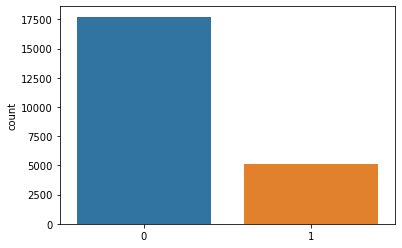

In [4]:
import seaborn as sns
sns.countplot(x = y_credito_treino)

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [6]:
X_res, y_res = sm.fit_resample(X_credito_treino, y_credito_treino)

<AxesSubplot:ylabel='count'>

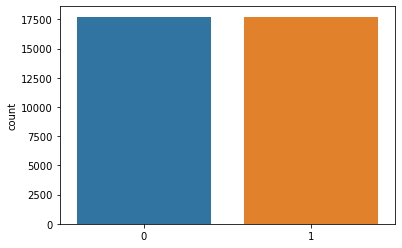

In [7]:
sns.countplot(x = y_res)

In [6]:
nb_credito = GaussianNB()
nb_credito.fit(X_credito_treino, y_credito_treino)

GaussianNB()

In [7]:
previsoes = nb_credito.predict(X_credito_teste)

In [15]:
previsoes

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
y_credito_teste

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
accuracy_score(y_credito_teste, previsoes)

0.7976470588235294

In [20]:
confusion_matrix(y_credito_teste, previsoes)

array([[7587,  157],
       [1821,  210]], dtype=int64)

In [21]:
!pip install yellowbrick

In [24]:
from yellowbrick.classifier import ConfusionMatrix

0.7976470588235294

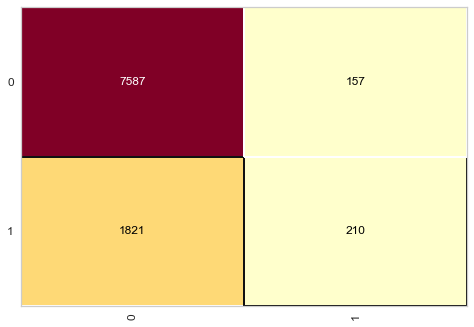

In [23]:
cm = ConfusionMatrix(nb_credito)
cm.fit(X_credito_treino, y_credito_treino)
cm.score(X_credito_teste, y_credito_teste)

In [30]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7744
           1       0.57      0.10      0.18      2031

    accuracy                           0.80      9775
   macro avg       0.69      0.54      0.53      9775
weighted avg       0.76      0.80      0.74      9775

